### **Part 1: Data Cleaning**
Preprocess the data before building the model
- Unify the units of the measurements
- Preprocess the NA value
- Calculate the missing value

In [2]:
import pandas as pd
import numpy as np

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/Users/michae14/nba_draft_combine_all_years.csv')

/var/folders/1d/38xtg69x6r507pqz8c2q64bm0000gn/T/ipykernel_25795/1210155241.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### **1.1 Unify the units of the measurements**

In [3]:
# Write a function to convert the measurements to inches
def convert_to_inches(feet_inches_str):
    if pd.isna(feet_inches_str):
        return None
    parts = feet_inches_str.split('\'')
    feet = int(parts[0])
    inches = float(parts[1].replace('"', '').strip())
    total_inches = (feet * 12) + inches
    return total_inches

# Convert and create new columns
df['Height W/O Shoes (inches)'] = df['Height W/o Shoes'].apply(convert_to_inches)
df['Standing Reach (inches)'] = df['Standing Reach'].apply(convert_to_inches)
df['Wingspan (inches)'] = df['Wingspan'].apply(convert_to_inches)

### **1.2 Preprocess the NA value**

In [4]:
# Count the number of NaN values in each column
na_count = df.isna().sum()

# Print the count of NaN values for each column
print(na_count)

Player                              0
Draft Class                         0
Overall Pick                        0
Lane Agility Time (seconds)         0
Shuttle Run (seconds)               0
Three Quarter Sprint (seconds)      0
Standing Vertical Leap (inches)     0
Max Vertical Leap (inches)          0
Max Bench Press (repetitions)       0
Hand Length (inches)                0
Hand Width (inches)                 0
Height W/o Shoes                   40
Standing Reach                     40
Weight (lbs)                        0
Wingspan                           39
Height W/O Shoes (inches)          40
Standing Reach (inches)            40
Wingspan (inches)                  39
dtype: int64


In [5]:
df[pd.isna(df['Standing Reach'])]

,Player,Draft Class,Overall Pick,Lane Agility Time (seconds),Shuttle Run (seconds),Three Quarter Sprint (seconds),Standing Vertical Leap (inches),Max Vertical Leap (inches),Max Bench Press (repetitions),Hand Length (inches),Hand Width (inches),Height W/o Shoes,Standing Reach,Weight (lbs),Wingspan,Height W/O Shoes (inches),Standing Reach (inches),Wingspan (inches)
138,Andris Biedrins,2004,11,-,-,-,-,-,-,-,-,NaN,NaN,-,NaN,NaN,NaN,NaN
162,Blake Stepp,2004,58,-,-,-,-,-,-,-,-,NaN,NaN,-,NaN,NaN,NaN,NaN
470,Alex Len,2013,5,-,-,-,-,-,-,9.0,10.75,NaN,NaN,-,7' 3.5'',NaN,NaN,87.5
620,Markelle Fultz,2017,1,-,-,-,-,-,-,-,-,NaN,NaN,-,NaN,NaN,NaN,NaN
688,Zion Williamson,2019,1,-,-,-,-,-,-,-,-,NaN,NaN,-,NaN,NaN,NaN,NaN
689,Ja Morant,2019,2,-,-,-,-,-,-,-,-,NaN,NaN,-,NaN,NaN,NaN,NaN
690,RJ Barrett,2019,3,-,-,-,-,-,-,-,-,NaN,NaN,-,NaN,NaN,NaN,NaN
691,De'Andre Hunter,2019,4,-,-,-,-,-,-,-,-,NaN,NaN,-,NaN,NaN,NaN,NaN
692,Darius Garland,2019,5,-,-,-,-,-,-,-,-,NaN,NaN,-,NaN,NaN,NaN,NaN
700,Chuma Okeke,2019,16,-,-,-,-,-,-,-,-,NaN,NaN,-,NaN,NaN,NaN,NaN


It seems like the player above did not partcipate in the draft combine, so we can see that almost all of them does not have any
measurement records. In this case, it is impossible to calculate the missing value so that I decide to delele the players above from the dataset.

In [6]:
# Drop rows where 'Wingspan (inches)' is NaN
df_cleaned = df.dropna(subset=['Standing Reach'])

# Count the number of NaN values in each column
na_count = df_cleaned.isna().sum()

# Print the count of NaN values for each column
print(na_count)

Player                             0
Draft Class                        0
Overall Pick                       0
Lane Agility Time (seconds)        0
Shuttle Run (seconds)              0
Three Quarter Sprint (seconds)     0
Standing Vertical Leap (inches)    0
Max Vertical Leap (inches)         0
Max Bench Press (repetitions)      0
Hand Length (inches)               0
Hand Width (inches)                0
Height W/o Shoes                   0
Standing Reach                     0
Weight (lbs)                       0
Wingspan                           0
Height W/O Shoes (inches)          0
Standing Reach (inches)            0
Wingspan (inches)                  0
dtype: int64


In [7]:
# Select multiple columns using a list
columns_to_select = [
    'Player', 'Draft Class', 'Overall Pick', 'Lane Agility Time (seconds)', 'Shuttle Run (seconds)', 
    'Three Quarter Sprint (seconds)', 'Standing Vertical Leap (inches)', 'Max Vertical Leap (inches)', 
    'Max Bench Press (repetitions)', 'Hand Length (inches)', 'Hand Width (inches)', 
    'Height W/O Shoes (inches)', 'Standing Reach (inches)', 'Weight (lbs)', 'Wingspan (inches)'
]

df_cleaned = df_cleaned[columns_to_select]
df_cleaned

,Player,Draft Class,Overall Pick,Lane Agility Time (seconds),Shuttle Run (seconds),Three Quarter Sprint (seconds),Standing Vertical Leap (inches),Max Vertical Leap (inches),Max Bench Press (repetitions),Hand Length (inches),Hand Width (inches),Height W/O Shoes (inches),Standing Reach (inches),Weight (lbs),Wingspan (inches)
0,Jamal Crawford,2000,8,-,-,-,-,-,-,-,-,76.50,102.5,175.0,82.00
1,Speedy Claxton,2000,20,10.48,-,3.06,36.0,42.5,6,-,-,70.50,94.5,166.0,72.00
2,Donnell Harvey,2000,22,11.23,-,-,33.0,32.5,15,-,-,79.25,105.5,220.0,84.50
3,Primoz Brezec,2000,27,11.53,-,3.55,26.0,29.5,-,-,-,84.75,110.0,243.0,86.00
4,Mark Madsen,2000,29,12.12,-,3.46,30.5,33.5,13,-,-,80.00,104.5,236.5,84.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,Jaylen Clark,2023,53,-,-,-,-,-,-,8.50,9.00,76.00,101.5,204.2,81.00
903,Jalen Slawson,2023,54,11.26,-,3.29,29.0,33.0,-,9.00,9.00,78.50,106.0,221.6,83.75
904,Isaiah Wong,2023,55,10.93,-,3.22,32.5,37.0,-,8.25,9.50,74.50,97.5,178.4,78.75
905,Trayce Jackson-Davis,2023,57,11.80,3.23,3.20,33.0,36.5,-,9.25,10.75,80.25,106.0,240.4,85.00


### **1.3 Calculate the missing value**

In [8]:
# Write a function to calculate how many '-' in the dataset
def count_dashes(dataframe):
    dash_counts = {}
    for column in dataframe.columns:
        # Count how many entries in this column are '-'
        count = (dataframe[column] == '-').sum()
        dash_counts[column] = count
    return dash_counts

# Calculate the counts of '-' in each column
count_dashes(df_cleaned)

{'Player': 0,
 'Draft Class': 0,
 'Overall Pick': 0,
 'Lane Agility Time (seconds)': 125,
 'Shuttle Run (seconds)': 577,
 'Three Quarter Sprint (seconds)': 122,
 'Standing Vertical Leap (inches)': 117,
 'Max Vertical Leap (inches)': 118,
 'Max Bench Press (repetitions)': 316,
 'Hand Length (inches)': 335,
 'Hand Width (inches)': 335,
 'Height W/O Shoes (inches)': 0,
 'Standing Reach (inches)': 0,
 'Weight (lbs)': 2,
 'Wingspan (inches)': 0}

**Dealing with missing values in the dataset is a crucial step, especially in a dataset that involves measurements or statistics that could be used for analysis or modeling. Normally, there are sereval methods to deal with the missing value in the dataset.**

1. **Imputation Based on Statistics:** One of the first method is to impute missing values using statistical values such as the mean, median, or mode. This is appropriate when the data distribution is not heavily skewed. However, this method is not applicable in this dataset, because it is counterintuitive that all of players who have missing measurements has same hand length or shuttle run seconds.

2. **Conditional Imputation:** The second method is to impute missing values based on other attributes within the same entry if certain attributes are correlated. For example, we know that taller players typically have longer hand, so that you could use regression or a simpler ratio from known data to estimate missing hand length.

3. **Using Predictive Models:** The third method is to consider using complex models such as decision trees or random forest to predict missing values based on other features in the dataset.

Now, I will use random forest to calculate the missing value

In [9]:
def remove_rows_with_dash_in_columns(dataframe, columns):
    
    # Copy the dataframe to avoid changing the original data
    df = dataframe.copy()
    
    # Loop through the specified columns and remove rows with '-'
    for column in columns:
        df = df[df[column] != '-']
    
    return df

column = ['Hand Length (inches)', 'Hand Width (inches)' ]
df_cleaned1 = remove_rows_with_dash_in_columns(df_cleaned, column)

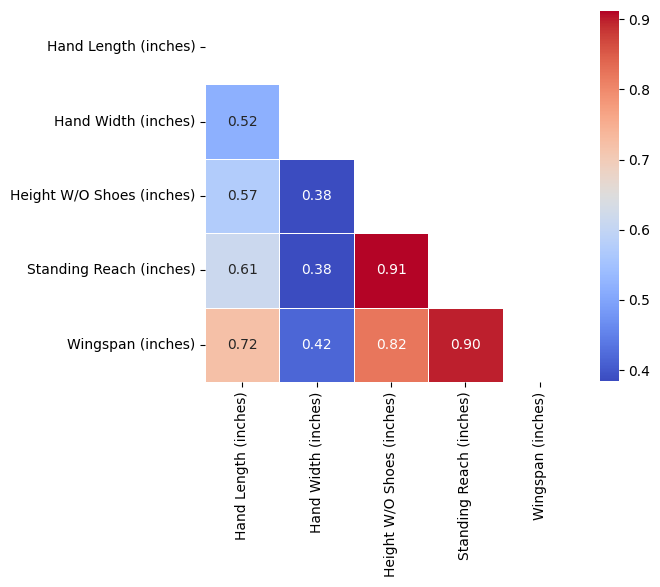

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select specific columns for the correlation matrix
columns_of_interest1 = [
    'Hand Length (inches)',
    'Hand Width (inches)',
    'Height W/O Shoes (inches)',
    'Standing Reach (inches)',
    'Wingspan (inches)'
]

# Create a DataFrame with only the columns of interest
df_cleaned1 = df_cleaned1[columns_of_interest1]

# Compute the correlation matrix
correlation_matrix = df_cleaned1.corr()

# Set up the mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", square=True, cbar_kws={"shrink": .8})

# Show the plot
plt.show()

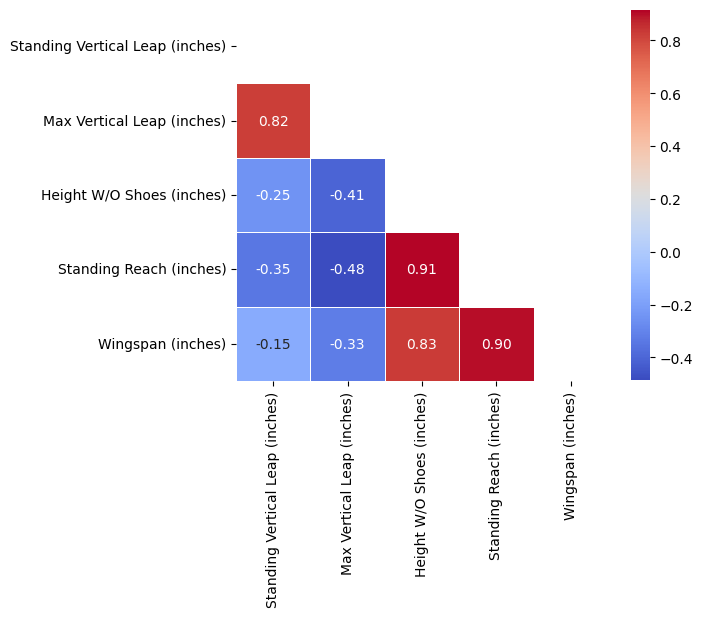

In [11]:
column2 = ['Standing Vertical Leap (inches)', 'Max Vertical Leap (inches)' ]
df_cleaned2 = remove_rows_with_dash_in_columns(df_cleaned, column2)

# Select specific columns for the correlation matrix
columns_of_interest2 = [
    'Standing Vertical Leap (inches)', 'Max Vertical Leap (inches)',
    'Height W/O Shoes (inches)',
    'Standing Reach (inches)',
    'Wingspan (inches)'
]

# Create a DataFrame with only the columns of interest
df_cleaned2 = df_cleaned2[columns_of_interest2]

# Compute the correlation matrix
correlation_matrix2 = df_cleaned2.corr()

# Set up the mask to hide the upper triangle
mask2 = np.triu(np.ones_like(correlation_matrix2, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix2, mask=mask2, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", square=True, cbar_kws={"shrink": .8})

# Show the plot
plt.show()

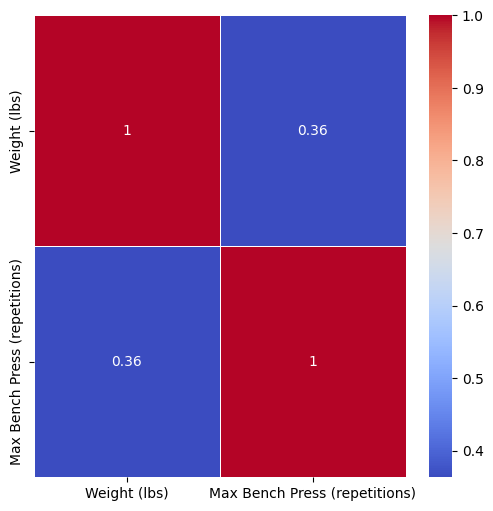

In [12]:
column3 = ['Weight (lbs)', 'Max Bench Press (repetitions)' ]
df_cleaned3 = remove_rows_with_dash_in_columns(df_cleaned, column3)

# Select specific columns for the correlation matrix
columns_of_interest3 = [ 'Weight (lbs)', 'Max Bench Press (repetitions)' ]

# Create a DataFrame with only the columns of interest
df_cleaned3 = df_cleaned3[columns_of_interest3]

# Compute the correlation matrix
correlation_matrix3 = df_cleaned3.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

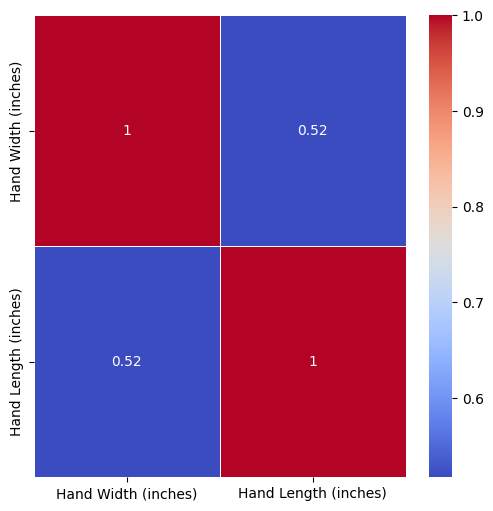

In [13]:
column4 = ['Hand Width (inches)', 'Hand Length (inches)' ]
df_cleaned4 = remove_rows_with_dash_in_columns(df_cleaned, column4)

# Select specific columns for the correlation matrix
columns_of_interest4 = [ 'Hand Width (inches)', 'Hand Length (inches)']

# Create a DataFrame with only the columns of interest
df_cleaned4 = df_cleaned4[columns_of_interest4]

# Compute the correlation matrix
correlation_matrix4 = df_cleaned4.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

**Using conditional imputation method to calculate the missing value of 'Hand Length (inches)' by using regression model, since the correlation coefficient of 0.72 indicates a strong positive correlation between 'Hand Length (inches)' and 'Wingspan (inches)'.** In the context of statistics, a correlation coefficient above 0.7 is often considered a high correlation, suggesting a significant linear relationship between the variables.

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Convert all '-' to NaN for numerical processing
df_cleaned.replace('-', pd.NA, inplace=True)

# Prepare data for regression
# Remove rows where either variable is missing for fitting the model
df_cleaned1_X_train = df_cleaned1[['Wingspan (inches)']].astype(float)  # Predictor
df_cleaned1_y_train = df_cleaned1['Hand Length (inches)'].astype(float) # Response

# Create and fit the model
model = LinearRegression()
model.fit(df_cleaned1_X_train, df_cleaned1_y_train)

# Impute missing 'Hand Length (inches)' using the model
missing_hand_length = df_cleaned['Hand Length (inches)'].isna()
df_cleaned.loc[missing_hand_length, 'Hand Length (inches)'] = np.round(model.predict(df_cleaned.loc[missing_hand_length, ['Wingspan (inches)']].astype(float)), 2)

**Using conditional imputation method to calculate the missing value of 'Hand Width (inches)', While the correlation coefficient of 0.52 indicates between 'Hand Length (inches)' and 'Hand Width (inches)' isn't as strong as the relationships we might look for in a perfect scenario for predictive imputation, it's still a meaningful correlation that indicates some level of predictive power.**

In [15]:
# Prepare data for regression
# Remove rows where either variable is missing for fitting the model
df_cleaned1_X_train_2 = df_cleaned1[['Hand Length (inches)']].astype(float)  # Predictor
df_cleaned1_y_train_2 = df_cleaned1['Hand Width (inches)'].astype(float) # Response

# Create and fit the model
model2 = LinearRegression()
model2.fit(df_cleaned1_X_train_2, df_cleaned1_y_train_2)

# Impute missing 'Hand Length (inches)' using the model
missing_hand_width = df_cleaned['Hand Width (inches)'].isna()
df_cleaned.loc[missing_hand_width, 'Hand Width (inches)'] = np.round(model2.predict(df_cleaned.loc[missing_hand_width, ['Hand Length (inches)']].astype(float)), 2)

### **1.4 Use Random Forest model to predict missing value**

Given that my dataset likely involves complex, non-linear relationships among various physical and performance metrics, Random Forest is a good choice due to its ability to capture such complexities without extensive hyperparameter tuning. Random Forest can use the subset of complete cases to learn and then predict missing values, leveraging its ensemble nature to avoid overfitting and provide robust estimates.

In [16]:
# Count the number of NaN values in each column
na_count = df_cleaned.isna().sum()

# Print the count of NaN values for each column
print(na_count)

Player                               0
Draft Class                          0
Overall Pick                         0
Lane Agility Time (seconds)        125
Shuttle Run (seconds)              577
Three Quarter Sprint (seconds)     122
Standing Vertical Leap (inches)    117
Max Vertical Leap (inches)         118
Max Bench Press (repetitions)      316
Hand Length (inches)                 0
Hand Width (inches)                  0
Height W/O Shoes (inches)            0
Standing Reach (inches)              0
Weight (lbs)                         2
Wingspan (inches)                    0
dtype: int64


In [17]:
df_cleaned[df_cleaned['Weight (lbs)'].isna()]

,Player,Draft Class,Overall Pick,Lane Agility Time (seconds),Shuttle Run (seconds),Three Quarter Sprint (seconds),Standing Vertical Leap (inches),Max Vertical Leap (inches),Max Bench Press (repetitions),Hand Length (inches),Hand Width (inches),Height W/O Shoes (inches),Standing Reach (inches),Weight (lbs),Wingspan (inches)
584,Kris Dunn,2016,5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8.62,9.32,75.0,100.0,<NA>,81.5
699,Romeo Langford,2019,14,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,9.00,9.00,76.5,103.0,<NA>,83.0


In [18]:
df_cleaned.loc[df_cleaned['Player'] == 'Kris Dunn', 'Weight (lbs)'] = 205
df_cleaned.loc[df_cleaned['Player'] == 'Romeo Langford', 'Weight (lbs)'] = 215

In [19]:
# Split the dataset into two parts: one with missing values and one without
df_cleaned_complete = df_cleaned.dropna()  # Rows without missing values

# Define the list of unuseful column names
unuseful_columns = ['Player', 'Overall Pick', 'Draft Class']

# Drop unuseful columns from the DataFrame
df_cleaned_complete = df_cleaned_complete.drop(columns=unuseful_columns)

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Get the list of columns with NaN values
columns_with_na = df_cleaned.columns[df_cleaned.isna().any()].tolist()
X = df_cleaned_complete.drop(columns=columns_with_na)

# Loop through each specified column index from 0 to 5
for column in columns_with_na[:6]:  # Assuming columns_with_na has at least 6 elements
    y = df_cleaned_complete[column]
    
    # Train a Random Forest model on non-missing data for the current column
    model = RandomForestRegressor()
    model.fit(X, y)

    # Predict missing values only for rows where the current column is missing
    df_cleaned_predict = df_cleaned[df_cleaned[column].isna()]
    df_cleaned_predict = df_cleaned_predict[X.columns]
    predicted_values = np.round(model.predict(df_cleaned_predict).astype(float), 2)

    # Find the indices where the current column is NA
    missing_indices = df_cleaned[df_cleaned[column].isna()].index

    # Replace the missing values in the original DataFrame
    df_cleaned.loc[missing_indices, column] = predicted_values

In [21]:
# Resetting the index of the DataFrame
df_cleaned.reset_index(drop=True, inplace=True)
df_final = df_cleaned

In [22]:
df_final

,Player,Draft Class,Overall Pick,Lane Agility Time (seconds),Shuttle Run (seconds),Three Quarter Sprint (seconds),Standing Vertical Leap (inches),Max Vertical Leap (inches),Max Bench Press (repetitions),Hand Length (inches),Hand Width (inches),Height W/O Shoes (inches),Standing Reach (inches),Weight (lbs),Wingspan (inches)
0,Jamal Crawford,2000,8,10.95,3.26,3.29,28.94,35.49,4.69,8.66,9.35,76.50,102.5,175.0,82.00
1,Speedy Claxton,2000,20,10.48,3.05,3.06,36.0,42.5,6,7.77,8.66,70.50,94.5,166.0,72.00
2,Donnell Harvey,2000,22,11.23,3.12,3.28,33.0,32.5,15,8.88,9.52,79.25,105.5,220.0,84.50
3,Primoz Brezec,2000,27,11.53,3.15,3.55,26.0,29.5,10.07,9.01,9.62,84.75,110.0,243.0,86.00
4,Mark Madsen,2000,29,12.12,3.14,3.46,30.5,33.5,13,8.88,9.52,80.00,104.5,236.5,84.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,Jaylen Clark,2023,53,10.95,3.08,3.19,30.11,37.07,8.62,8.50,9.00,76.00,101.5,204.2,81.00
863,Jalen Slawson,2023,54,11.26,3.03,3.29,29.0,33.0,8.14,9.00,9.00,78.50,106.0,221.6,83.75
864,Isaiah Wong,2023,55,10.93,3.04,3.22,32.5,37.0,5.33,8.25,9.50,74.50,97.5,178.4,78.75
865,Trayce Jackson-Davis,2023,57,11.80,3.23,3.20,33.0,36.5,12.86,9.25,10.75,80.25,106.0,240.4,85.00


### **Part 2: Explore the data**
Fix the data type problem, and create the charm to explore the data.

In [23]:
print(df_final.dtypes)

# Convert columns to numeric, coercing errors to NaN (missing values)
df_final['Lane Agility Time (seconds)'] = pd.to_numeric(df_final['Lane Agility Time (seconds)'], errors='coerce')
df_final['Shuttle Run (seconds)'] = pd.to_numeric(df_final['Shuttle Run (seconds)'], errors='coerce')
df_final['Three Quarter Sprint (seconds)'] = pd.to_numeric(df_final['Three Quarter Sprint (seconds)'], errors='coerce')
df_final['Standing Vertical Leap (inches)'] = pd.to_numeric(df_final['Standing Vertical Leap (inches)'], errors='coerce')
df_final['Max Vertical Leap (inches)'] = pd.to_numeric(df_final['Max Vertical Leap (inches)'], errors='coerce')
df_final['Max Bench Press (repetitions)'] = pd.to_numeric(df_final['Max Bench Press (repetitions)'], errors='coerce')
df_final['Hand Length (inches)'] = pd.to_numeric(df_final['Hand Length (inches)'], errors='coerce')
df_final['Hand Width (inches)'] = pd.to_numeric(df_final['Hand Width (inches)'], errors='coerce')
df_final['Weight (lbs)'] = pd.to_numeric(df_final['Weight (lbs)'], errors='coerce')

Player                              object
Draft Class                          int64
Overall Pick                         int64
Lane Agility Time (seconds)         object
Shuttle Run (seconds)               object
Three Quarter Sprint (seconds)      object
Standing Vertical Leap (inches)     object
Max Vertical Leap (inches)          object
Max Bench Press (repetitions)       object
Hand Length (inches)                object
Hand Width (inches)                 object
Height W/O Shoes (inches)          float64
Standing Reach (inches)            float64
Weight (lbs)                        object
Wingspan (inches)                  float64
dtype: object


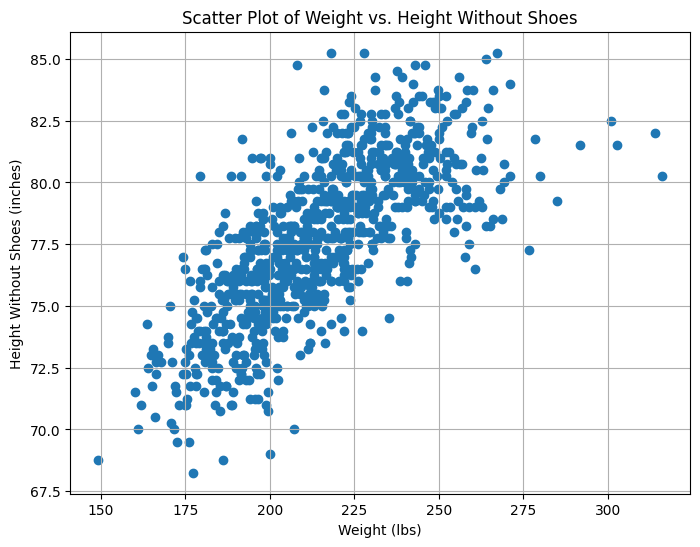

In [24]:
# Create a scatter plot to examine the relationship between players' weight and height
plt.figure(figsize=(8, 6))
plt.scatter(df_final['Weight (lbs)'], df_final['Height W/O Shoes (inches)'])
plt.title('Scatter Plot of Weight vs. Height Without Shoes')
plt.xlabel('Weight (lbs)')
plt.ylabel('Height Without Shoes (inches)')
plt.grid(True)
plt.show()

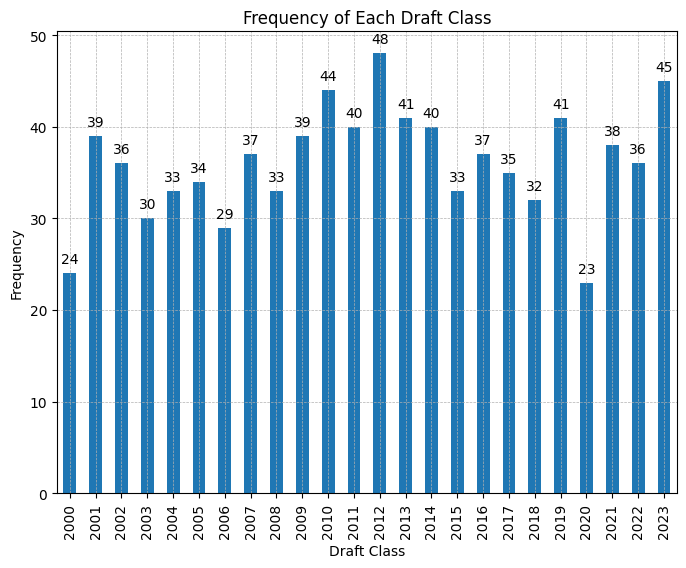

In [25]:
# Calculate the frequency of each draft class
draft_class_counts = df_final['Draft Class'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
ax = draft_class_counts.plot(kind='bar')  # Create a bar plot
plt.title('Frequency of Each Draft Class')  # Title of the plot
plt.xlabel('Draft Class')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding data labels
for p in ax.patches:  # Loop over the bars
    ax.annotate(f'{int(p.get_height())}',  # Text to display
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                ha='center',  # Center alignment
                va='center',  # Center alignment
                xytext=(0, 10),  # Distance from the bar
                textcoords='offset points')  # Offset (x, y) from the data point

plt.show()

### **Part 3: Develop the model**
1. Linear Regression Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Drop unuseful comlumns in the prediction model like player name and draft class
df_final = df_final.drop(columns=['Player', 'Draft Class'])

# Separate features (X) and target variable (y)
X = df_final.drop(columns=['Overall Pick'])  # Features
y = df_final['Overall Pick']  # Target variable

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [28]:
# Add a constant term to the features (required for statsmodels)
X_train = sm.add_constant(X_train)

# Fit the linear regression model
regression_model = sm.OLS(y_train, X_train).fit()

# Get the summary table of regression results
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Overall Pick   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.342
Date:                Wed, 26 Jun 2024   Prob (F-statistic):            0.00603
Time:                        16:23:33   Log-Likelihood:                -2919.2
No. Observations:                 693   AIC:                             5864.
Df Residuals:                     680   BIC:                             5923.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              58.5780     36.012      1.627      0.104     -12.131     129.287
Lane Agility Time (seconds)         3.3389      1.508      2.215      0.027       0.379       6.299
Shuttle Run (seconds)               2.9338      4.979      0.589      0.556      -6.843      12.711
Three Quarter Sprint (seconds)      3.2579      7.499      0.434      0.664     -11.465      17.981
Standing Vertical Leap (inches)    -0.4775      0.446     -1.071      0.284      -1.353       0.398
Max Vertical Leap (inches)         -0.4000      0.386     -1.037      0.300      -1.157       0.357
Max Bench Press (repetitions)       0.2062      0.169      1.222      0.222      -0.125       0.537
Hand Length (inches)                0.1847      2.811      0.066      0.948      -5.335       5.705
Hand Width (inches)                -0.7784      1.446     -0.538      0.590      -3.617       2.060
Height W/O Shoes (inches)           0.4646      0.536      0.866      0.387      -0.588       1.517
Standing Reach (inches)            -1.1122      0.505     -2.203      0.028      -2.103      -0.121
Weight (lbs)                       -0.0824      0.046     -1.778      0.076      -0.173       0.009
Wingspan (inches)                   0.5100      0.509      1.002      0.317      -0.490       1.510
==============================================================================
Omnibus:                      308.687   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.509
Skew:                           0.038   Prob(JB):                     7.16e-09
Kurtosis:                       1.863   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X_test

,Lane Agility Time (seconds),Shuttle Run (seconds),Three Quarter Sprint (seconds),Standing Vertical Leap (inches),Max Vertical Leap (inches),Max Bench Press (repetitions),Hand Length (inches),Hand Width (inches),Height W/O Shoes (inches),Standing Reach (inches),Weight (lbs),Wingspan (inches)
429,10.98,3.29,3.25,31.50,38.00,5.00,8.75,9.25,76.00,102.0,179.2,83.00
419,11.77,3.15,3.18,32.00,35.50,6.00,9.00,10.25,77.75,104.5,232.8,84.00
106,11.45,3.04,3.20,32.50,39.50,9.31,7.73,8.63,71.00,93.5,162.0,71.50
701,11.62,3.19,3.39,29.16,35.24,9.27,8.00,9.25,76.75,104.0,216.4,81.25
522,11.21,3.14,3.38,29.00,36.00,7.21,8.50,8.50,79.25,103.0,208.2,80.50
...,...,...,...,...,...,...,...,...,...,...,...,...
100,11.30,3.07,3.36,26.50,32.50,13.00,9.28,9.83,83.50,111.5,250.0,89.00
160,11.64,3.18,3.34,25.50,31.50,1.00,9.19,9.76,81.50,111.5,223.0,88.00
193,11.02,2.97,3.29,28.85,35.90,8.17,8.64,9.34,78.25,105.5,195.8,81.75
658,10.72,3.12,3.11,34.50,42.00,12.00,8.25,9.00,75.50,97.5,200.6,78.00


In [30]:
# Predict on the testing data
X_test = sm.add_constant(X_test)
y_pred = np.round(regression_model.predict(X_test),0)

predict = pd.DataFrame({'Actual_Draft': y_test, 'Predicted_Draft': y_pred})
predict

,Actual_Draft,Predicted_Draft
429,12,30.0
419,2,26.0
106,8,34.0
701,29,30.0
522,23,31.0
...,...,...
100,2,27.0
160,56,28.0
193,54,27.0
658,17,27.0


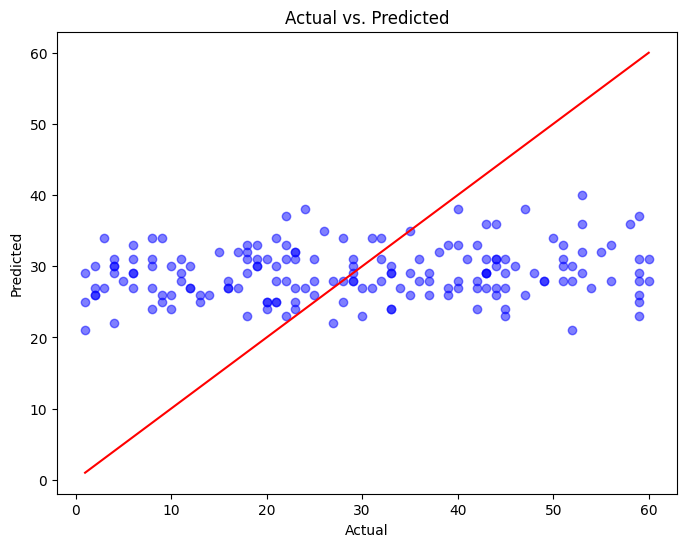

In [31]:
# Plot the actual target variable against the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line representing perfect predictions
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [32]:
# Evaluate the model
reg_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", reg_mse)

Mean Squared Error: 277.64367816091954


In [33]:
# Initialize an empty list to store MSEs for each sample
mse_list = []

# Generate 100 samples and compute MSE for each
for i in range(1000):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Initialize the linear regression model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = model.predict(X_test)
    
    # Compute MSE for the current sample
    mse = mean_squared_error(y_test, y_pred)
    
    # Append MSE to the list
    mse_list.append(mse)

# Calculate the average MSE across all samples
average_mse = np.mean(mse_list)

# Print the average MSE
print("Average MSE across 1000 samples:", average_mse)

Average MSE across 1000 samples: 277.4326219147058


2. Ordinal Regression Model

In [34]:
# Define categories based on draft pick ranges
# Category 0: Lottery Pick
# Category 1: First Round (15th-30th Picks)
# Category 2: Second Round (31th-60th Picks)
def categorize_draft_pick(draft_pick):
    if draft_pick <= 14:
        return 0
    elif 15 <= draft_pick <= 30:
        return 1
    else:
        return 2

# Convert draft pick labels into categories
y_categories = np.array([categorize_draft_pick(draft_pick) for draft_pick in y])

In [35]:
from sklearn.preprocessing import StandardScaler
from mord import LogisticAT

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categories, test_size=0.2, random_state=14)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train ordinal logistic regression model
ordinal_logit_model = LogisticAT(alpha=0)
ordinal_logit_model.fit(X_train_scaled, y_train)

# Predict categories for the test data
predicted_categories = ordinal_logit_model.predict(X_test_scaled)

# Now you have the predicted categories for the test data
predict1 = pd.DataFrame({'Actual_Draft': y_test, 'Predicted_Draft': predicted_categories})
predict1

,Actual_Draft,Predicted_Draft
0,0,1
1,0,1
2,0,2
3,1,2
4,1,2
...,...,...
169,0,1
170,2,1
171,2,1
172,1,1


In [36]:
predict = np.array(y_test == predicted_categories)
# Calculate accuracy by finding the mean of the 'predict' array
# True values are counted as 1, False as 0, so mean gives the proportion of Trues
accuracy = np.mean(predict)
print(f"Accuracy of Ordinal Regression Model: {accuracy * 100:.2f}%") 

Accuracy of Ordinal Regression Model: 39.08%


### **Part 4: Prepare the Draft Combine 2024 dataset that ready for predicting the Draft 2024**

In [37]:
# Read the CSV file into a pandas DataFrame
draft_2024_df = pd.read_csv('/Users/michae14/nba_draft_combine_2024.csv')

In [38]:
# Convert and create new columns
draft_2024_df['Height W/O Shoes (inches)'] = draft_2024_df['Height W/o Shoes'].apply(convert_to_inches)
draft_2024_df['Standing Reach (inches)'] = draft_2024_df['Standing Reach'].apply(convert_to_inches)
draft_2024_df['Wingspan (inches)'] = draft_2024_df['Wingspan'].apply(convert_to_inches)

In [39]:
# Select multiple columns using a list
columns_to_select = [
    'Player', 'Draft Class', 'Lane Agility Time (seconds)', 'Shuttle Run (seconds)', 
    'Three Quarter Sprint (seconds)', 'Standing Vertical Leap (inches)', 'Max Vertical Leap (inches)', 
    'Max Bench Press (repetitions)', 'Hand Length (inches)', 'Hand Width (inches)', 
    'Height W/O Shoes (inches)', 'Standing Reach (inches)', 'Weight (lbs)', 'Wingspan (inches)'
]

draft_2024_df = draft_2024_df[columns_to_select]

In [40]:
# Convert all '-' to NaN for numerical processing
draft_2024_df.replace('-', pd.NA, inplace=True)
draft_2024_df

,Player,Draft Class,Lane Agility Time (seconds),Shuttle Run (seconds),Three Quarter Sprint (seconds),Standing Vertical Leap (inches),Max Vertical Leap (inches),Max Bench Press (repetitions),Hand Length (inches),Hand Width (inches),Height W/O Shoes (inches),Standing Reach (inches),Weight (lbs),Wingspan (inches)
0,Michael Ajayi,2024,11.77,3.17,3.21,27.0,34.5,<NA>,9.50,9.75,77.75,106.5,227.8,84.75
1,Trey Alexander,2024,11.37,2.92,3.21,26.5,32.0,<NA>,8.75,10.00,75.25,101.5,187.0,82.50
2,Izan Almansa,2024,10.94,2.96,3.11,28.0,35.0,<NA>,9.25,9.25,81.25,110.0,219.6,85.00
3,Reece Beekman,2024,10.86,3.08,2.94,30.0,36.5,<NA>,8.50,9.00,73.25,100.0,196.4,78.50
4,Adem Bona,2024,11.01,3.01,3.15,35.0,40.0,<NA>,9.50,10.00,80.25,108.0,243.2,87.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Ja'Kobe Walter,2024,11.00,2.92,3.04,30.5,38.5,<NA>,8.75,9.75,76.25,102.5,197.6,82.00
73,Kel'el Ware,2024,10.97,2.91,3.29,32.5,36.0,<NA>,9.50,10.25,83.75,112.5,230.0,88.50
74,Jamir Watkins,2024,10.64,3.16,3.01,30.5,35.5,<NA>,9.00,9.50,77.00,104.0,211.6,82.75
75,Jaylen Wells,2024,11.28,3.03,3.08,27.5,36.0,<NA>,8.25,9.25,78.50,103.5,206.2,79.25


In [41]:
# Count the number of NaN values in each column
na_count = draft_2024_df.isna().sum()

# Print the count of NaN values for each column
print(na_count)

Player                              0
Draft Class                         0
Lane Agility Time (seconds)         5
Shuttle Run (seconds)               6
Three Quarter Sprint (seconds)      5
Standing Vertical Leap (inches)     5
Max Vertical Leap (inches)          5
Max Bench Press (repetitions)      77
Hand Length (inches)                0
Hand Width (inches)                 0
Height W/O Shoes (inches)           0
Standing Reach (inches)             0
Weight (lbs)                        0
Wingspan (inches)                   0
dtype: int64


In [42]:
# Specify the columns where NA values should lead to row being dropped
na_columns = [
    'Lane Agility Time (seconds)',
    'Shuttle Run (seconds)',
    'Three Quarter Sprint (seconds)',
    'Standing Vertical Leap (inches)',
    'Max Vertical Leap (inches)'
]

# Drop rows with any NA values in the specified columns
draft_2024_df_cleaned = draft_2024_df.dropna(subset=na_columns)

In [43]:
X = df_cleaned_complete.drop(columns=['Max Bench Press (repetitions)'])
y = df_cleaned_complete['Max Bench Press (repetitions)']
    
# Train a Random Forest model on non-missing data for the current column
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Predict missing values only for rows where the current column is missing
draft_2024_df_predict = draft_2024_df_cleaned.drop(columns=['Max Bench Press (repetitions)', 'Draft Class', 'Player'])
predicted_values = np.round(rf_model.predict(draft_2024_df_predict).astype(float), 0)

# Find the indices where the current column is NA
missing_indices = draft_2024_df_cleaned.index

# Replace the missing values in the original DataFrame
draft_2024_df.loc[missing_indices, 'Max Bench Press (repetitions)'] = predicted_values

In [44]:
# Split the dataset into two parts: one with missing values and one without
draft_2024_df_complete = draft_2024_df.dropna()  # Rows without missing values

# Define the list of unuseful column names
unuseful_columns = ['Player', 'Draft Class']

# Drop unuseful columns from the DataFrame
draft_2024_df_complete = draft_2024_df_complete.drop(columns=unuseful_columns)

# Get the list of columns with NaN values
columns_with_na = draft_2024_df.columns[draft_2024_df.isna().any()].tolist()
X = df_cleaned_complete.drop(columns=columns_with_na)

# Loop through each specified column index from 0 to 5
for column in columns_with_na[:6]:  # Assuming columns_with_na has at least 5 elements
    y = df_cleaned_complete[column]
    
    # Train a Random Forest model on non-missing data for the current column
    rf_model = RandomForestRegressor()
    rf_model.fit(X, y)

    # Predict missing values only for rows where the current column is missing
    draft_2024_df_predict = draft_2024_df[draft_2024_df[column].isna()]
    draft_2024_df_predict = draft_2024_df_predict[X.columns]
    predicted_values = np.round(rf_model.predict(draft_2024_df_predict).astype(float), 2)

    # Find the indices where the current column is NA
    missing_indices = draft_2024_df[draft_2024_df[column].isna()].index

    # Replace the missing values in the original DataFrame
    draft_2024_df.loc[missing_indices, column] = predicted_values

In [45]:
# Check the data type
print(draft_2024_df.dtypes)

Player                              object
Draft Class                          int64
Lane Agility Time (seconds)         object
Shuttle Run (seconds)               object
Three Quarter Sprint (seconds)      object
Standing Vertical Leap (inches)     object
Max Vertical Leap (inches)          object
Max Bench Press (repetitions)       object
Hand Length (inches)               float64
Hand Width (inches)                float64
Height W/O Shoes (inches)          float64
Standing Reach (inches)            float64
Weight (lbs)                       float64
Wingspan (inches)                  float64
dtype: object


In [46]:
draft_2024_df['Lane Agility Time (seconds)'] = draft_2024_df[['Lane Agility Time (seconds)']].astype(float) 
draft_2024_df['Shuttle Run (seconds)'] = draft_2024_df[['Shuttle Run (seconds)']].astype(float) 
draft_2024_df['Three Quarter Sprint (seconds)'] = draft_2024_df[['Three Quarter Sprint (seconds)']].astype(float) 
draft_2024_df['Standing Vertical Leap (inches)'] = draft_2024_df[['Standing Vertical Leap (inches)']].astype(float) 
draft_2024_df['Max Vertical Leap (inches)'] = draft_2024_df[['Max Vertical Leap (inches)']].astype(float) 
draft_2024_df['Max Bench Press (repetitions)'] = draft_2024_df[['Max Bench Press (repetitions)']].astype(float) 

In [47]:
draft_2024_df

,Player,Draft Class,Lane Agility Time (seconds),Shuttle Run (seconds),Three Quarter Sprint (seconds),Standing Vertical Leap (inches),Max Vertical Leap (inches),Max Bench Press (repetitions),Hand Length (inches),Hand Width (inches),Height W/O Shoes (inches),Standing Reach (inches),Weight (lbs),Wingspan (inches)
0,Michael Ajayi,2024,11.77,3.17,3.21,27.0,34.5,8.0,9.50,9.75,77.75,106.5,227.8,84.75
1,Trey Alexander,2024,11.37,2.92,3.21,26.5,32.0,7.0,8.75,10.00,75.25,101.5,187.0,82.50
2,Izan Almansa,2024,10.94,2.96,3.11,28.0,35.0,7.0,9.25,9.25,81.25,110.0,219.6,85.00
3,Reece Beekman,2024,10.86,3.08,2.94,30.0,36.5,8.0,8.50,9.00,73.25,100.0,196.4,78.50
4,Adem Bona,2024,11.01,3.01,3.15,35.0,40.0,13.0,9.50,10.00,80.25,108.0,243.2,87.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Ja'Kobe Walter,2024,11.00,2.92,3.04,30.5,38.5,11.0,8.75,9.75,76.25,102.5,197.6,82.00
73,Kel'el Ware,2024,10.97,2.91,3.29,32.5,36.0,10.0,9.50,10.25,83.75,112.5,230.0,88.50
74,Jamir Watkins,2024,10.64,3.16,3.01,30.5,35.5,10.0,9.00,9.50,77.00,104.0,211.6,82.75
75,Jaylen Wells,2024,11.28,3.03,3.08,27.5,36.0,8.0,8.25,9.25,78.50,103.5,206.2,79.25


### **Part 5: Predict the Draft 2024**

In [48]:
draft_2024_df_predict = draft_2024_df.drop(columns=['Player', 'Draft Class'])

# Predict on the draft 2024 data
draft_2024_df_predict = sm.add_constant(draft_2024_df_predict)
draft_2024_pred = np.round(regression_model.predict(draft_2024_df_predict),0)

draft_2024_pred

0     29.0
1     34.0
2     23.0
3     27.0
4     20.0
      ... 
72    27.0
73    20.0
74    26.0
75    28.0
76    32.0
Length: 77, dtype: float64

In [49]:
predict2024 = pd.DataFrame({'Player': draft_2024_df['Player'], 'Predicted_Draft': draft_2024_pred})
predict2024

,Player,Predicted_Draft
0,Michael Ajayi,29.0
1,Trey Alexander,34.0
2,Izan Almansa,23.0
3,Reece Beekman,27.0
4,Adem Bona,20.0
...,...,...
72,Ja'Kobe Walter,27.0
73,Kel'el Ware,20.0
74,Jamir Watkins,26.0
75,Jaylen Wells,28.0


In [50]:
predict2024[predict2024['Player'] == 'Bronny James']

,Player,Predicted_Draft
38,Bronny James,27.0


In [51]:
# Download the final data as csv in computer
predict2024.to_csv('predict2024.csv', index=False)